# Pipelines in scikit-learn - Lab 

## Introduction 

In this lab, you will work with the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality). The goal of this lab is not to teach you a new classifier or even show you how to improve the performance of your existing model, but rather to help you streamline your machine learning workflows using scikit-learn pipelines. Pipelines let you keep your preprocessing and model building steps together, thus simplifying your cognitive load. You will see for yourself why pipelines are great by building the same KNN model twice in different ways. 

## Objectives 

- Construct pipelines in scikit-learn 
- Use pipelines in combination with `GridSearchCV()`

## Import the data

Run the following cell to import all the necessary classes, functions, and packages you need for this lab. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

Import the `'winequality-red.csv'` dataset and print the first five rows of the data.  

In [2]:
# Import the data
df = pd.read_csv('winequality-red.csv')


# Print the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Use the `.describe()` method to print the summary stats of all columns in `df`. Pay close attention to the range (min and max values) of all columns. What do you notice? 

In [4]:
# Print the summary stats of all columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As you can see from the data, not all features are on the same scale. Since we will be using k-nearest neighbors, which uses the distance between features to classify points, we need to bring all these features to the same scale. This can be done using standardization. 



However, before standardizing the data, let's split it into training and test sets. 

> Note: You should always split the data before applying any scaling/preprocessing techniques in order to avoid data leakage. If you don't recall why this is necessary, you should refer to the **KNN with scikit-learn - Lab.** 

## Split the data 

- Assign the target (`'quality'` column) to `y` 
- Drop this column and assign all the predictors to `X` 
- Split `X` and `y` into 75/25 training and test sets. Set `random_state` to 42  

In [5]:
# Split the predictor and target variables
y = df['quality']
X = df.drop(columns=['quality'], axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Standardize your data 

- Instantiate a `StandardScaler()` 
- Transform and fit the training data 
- Transform the test data 

In [8]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.974181,-0.232603,1.114588,-0.246318,-0.110746,-1.060007,-0.962240,1.756955,-0.786419,-1.313194,-1.152577
1,0.281894,0.378026,0.090887,-0.246318,0.193294,-1.060007,-0.962240,1.105315,0.316104,-0.970646,-1.247037
2,-0.710137,0.322515,-1.393481,-0.317176,0.051409,-0.669757,-0.992531,-1.023376,0.705229,-0.628099,1.019988
3,-0.009880,0.044956,-0.165039,0.603976,-0.252631,0.013182,1.976031,0.453675,-0.267585,-0.285551,-0.963659
4,0.573668,1.349482,-0.011484,0.178829,-0.212093,0.793683,0.279710,0.888102,-0.008168,0.056996,0.169854


## Train a model 

- Instantiate a `KNeighborsClassifier()` 
- Fit the classifier to the scaled training data 

In [9]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

KNeighborsClassifier()

Use the classifier's `.score()` method to calculate the accuracy on the test set (use the scaled test data) 

In [10]:
# Print the accuracy on test set
clf.score(scaled_data_train, y_train), clf.score(scaled_data_test, y_test)

(0.713094245204337, 0.5775)

Nicely done. This pattern (preprocessing and fitting models) is very common. Although this process is fairly straightforward once you get the hang of it, **pipelines** make this process simpler, intuitive, and less error-prone. 

Instead of standardizing and fitting the model separately, you can do this in one step using `sklearn`'s `Pipeline()`. A pipeline takes in any number of preprocessing steps, each with `.fit()` and `transform()` methods (like `StandardScaler()` above), and a final step with a `.fit()` method (an estimator like `KNeighborsClassifier()`). The pipeline then sequentially applies the preprocessing steps and finally fits the model. Do this now.   

## Build a pipeline (I) 

Build a pipeline with two steps: 

- First step: `StandardScaler()` 
- Second step (estimator): `KNeighborsClassifier()` 


In [15]:
# Build a pipeline with StandardScaler and KNeighborsClassifier
scaled_pipeline_1 = Pipeline([('scaler', StandardScaler()),
                    ('knn', KNeighborsClassifier())])

- Transform and fit the model using this pipeline to the training data (you should use `X_train` here) 
- Print the accuracy of the model on the test set (you should use `X_test` here) 

In [16]:
# Fit the training data to pipeline
# Fit will set your transformations
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
# .score will do scaler.transform()
scaled_pipeline_1.score(X_train, y_train), scaled_pipeline_1.score(X_test, y_test)

(0.713094245204337, 0.5775)

If you did everything right, this answer should match the one from above! 

Of course, you can also perform a grid search to determine which combination of hyperparameters can be used to build the best possible model. The way you define the pipeline still remains the same. What you need to do next is define the grid and then use `GridSearchCV()`. Let's do this now.

## Build a pipeline (II)

Again, build a pipeline with two steps: 

- First step: `StandardScaler()` 
- Second step (estimator): `RandomForestClassifier()`. Set `random_state=123` when instantiating the random forest classifier 

In [20]:
# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('scaler', StandardScaler()),
                             ('RF', RandomForestClassifier(random_state=123))])

Use the defined `grid` to perform a grid search. We limited the hyperparameters and possible values to only a few values in order to limit the runtime. 

In [22]:
# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

Define a grid search now. Use: 
- the pipeline you defined above (`scaled_pipeline_2`) as the estimator 
- the parameter `grid` 
- `'accuracy'` to evaluate the score 
- 5-fold cross-validation 

In [24]:
# Define a grid search
gridsearch = GridSearchCV(scaled_pipeline_2, param_grid=grid, cv=5, n_jobs=-1, verbose=1)

After defining the grid values and the grid search criteria, all that is left to do is fit the model to training data and then score the test set. Do this below: 

In [25]:
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=123))]),
             n_jobs=-1,
             param_grid=[{'RF__max_depth': [4, 5, 6],
                          'RF__min_samples_leaf': [1, 3, 5],
                          'RF__min_samples_split': [2, 5, 10]}],
             verbose=1)

In [26]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=3,
                                        random_state=123))])

In [28]:
best_pipeline = gridsearch.best_estimator_

In [29]:
best_pipeline.score(X_train, y_train), best_pipeline.score(X_test, y_test)

(0.7381150959132611, 0.6075)

In [30]:
best_pipeline['RF']

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=123)

In [31]:
best_pipeline['RF'].feature_importances_

array([0.05242672, 0.11072235, 0.05324303, 0.04391463, 0.0587778 ,
       0.0381138 , 0.12942841, 0.08746759, 0.04975756, 0.13560204,
       0.24054608])

In [37]:
feature_importances = best_pipeline['RF'].feature_importances_

In [38]:
features = X_train.columns

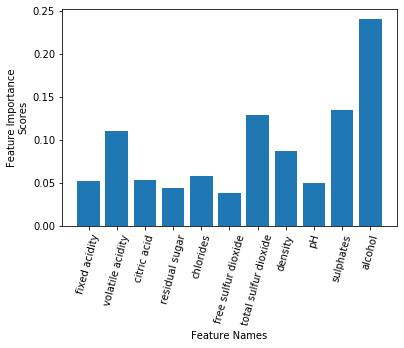

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(features, feature_importances)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance\nScores')
plt.xticks(rotation=75)
plt.show()

In [50]:
#Let's create a function for this

def plot_feature_importances(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    plt.bar(features, feature_importances)
    plt.xlabel('Feature Names')
    plt.ylabel('Feature Importance\nScores')
    plt.xticks(rotation=75)
    plt.show()

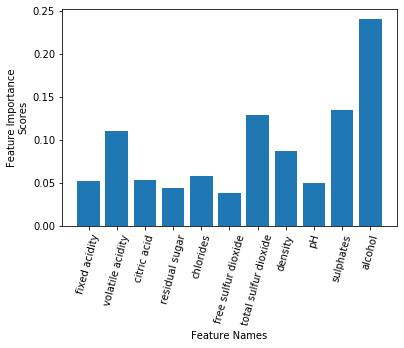

In [52]:
plot_feature_importances(best_pipeline['RF'], X_train)

## Summary

See how easy it is to define pipelines? Pipelines keep your preprocessing steps and models together, thus making your life easier. You can apply multiple preprocessing steps before fitting a model in a pipeline. You can even include dimensionality reduction techniques such as PCA in your pipelines. In a later section, you will work on this too! 